In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

/home/winter24/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
train_file=r'./Traffic.csv'
df=pd.read_csv(train_file)
df=pd.DataFrame(df)
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [3]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [4]:
df.duplicated().sum()

0

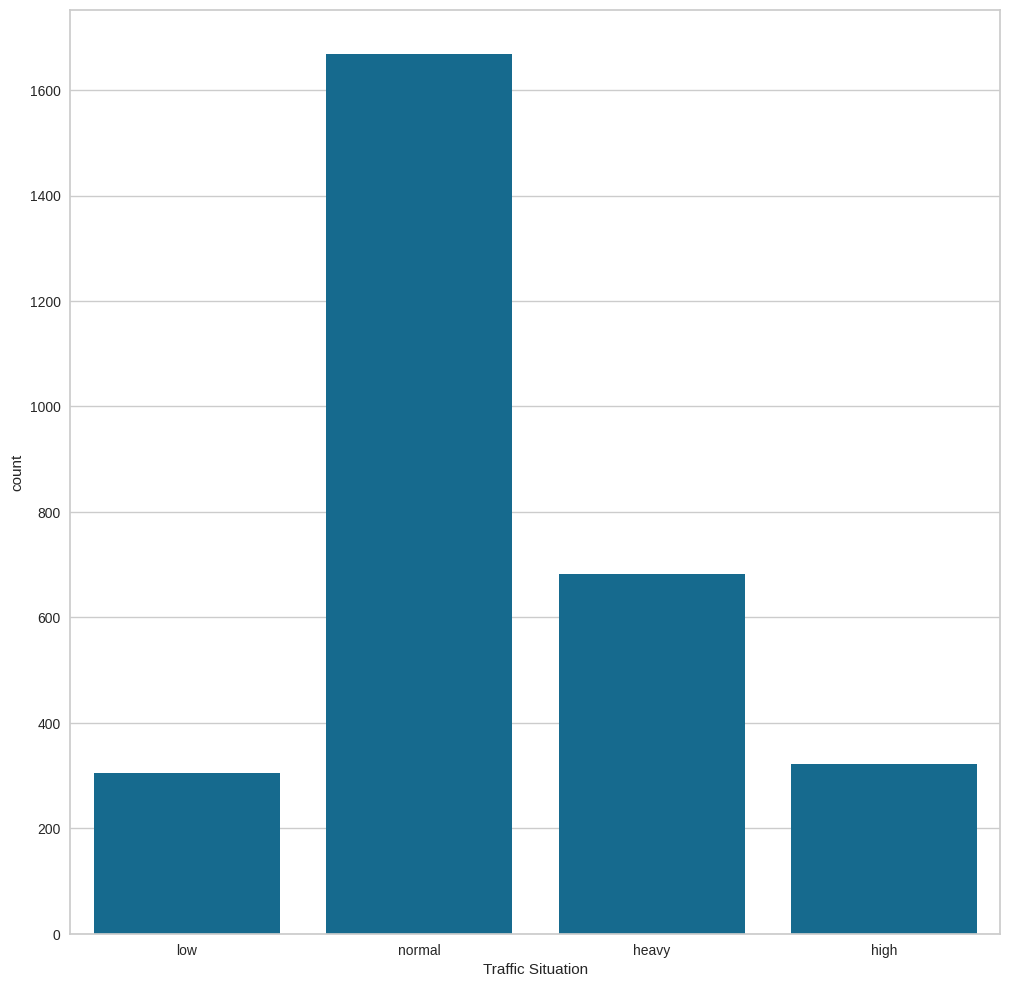

In [5]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Traffic Situation')
plt.show()

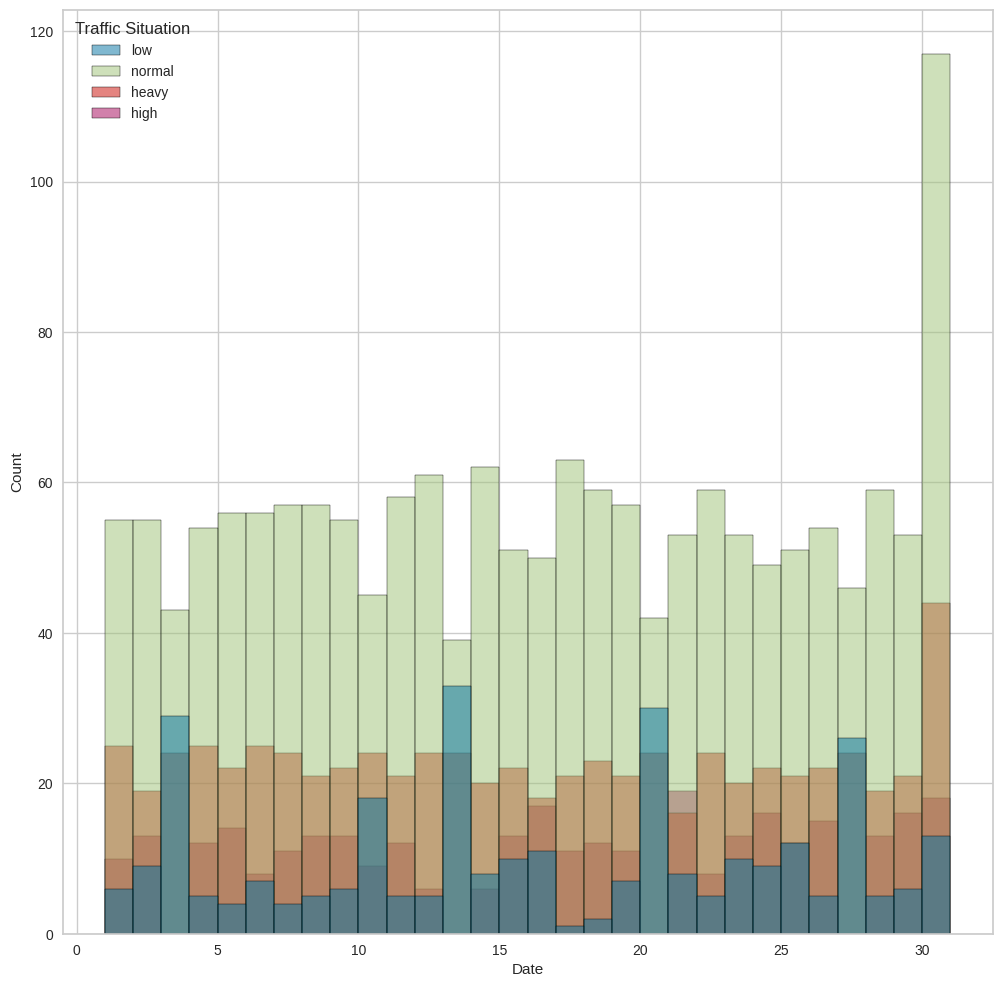

In [6]:
plt.figure(figsize=(12,12))
sns.histplot(data=df,x='Date',hue='Traffic Situation',bins=30)
plt.show()

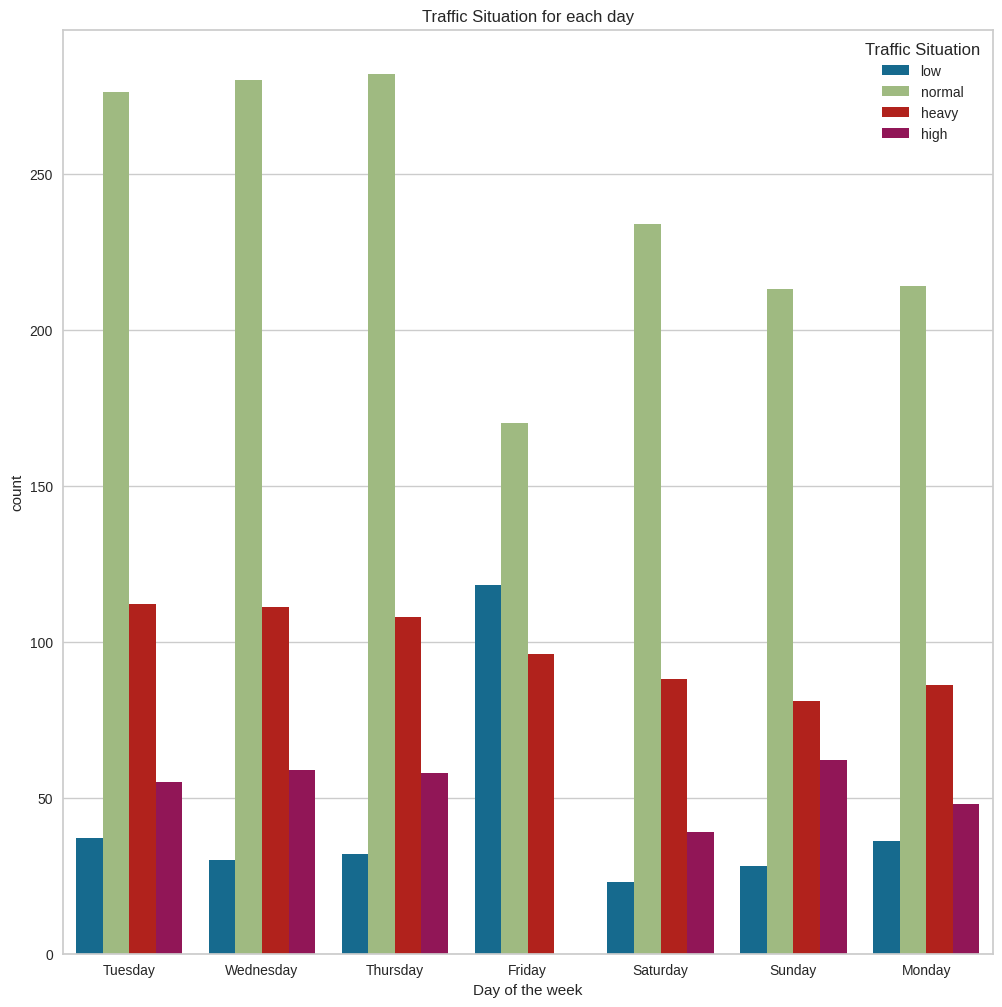

In [7]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Day of the week',hue='Traffic Situation')
plt.title("Traffic Situation for each day")
plt.show()

In [8]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

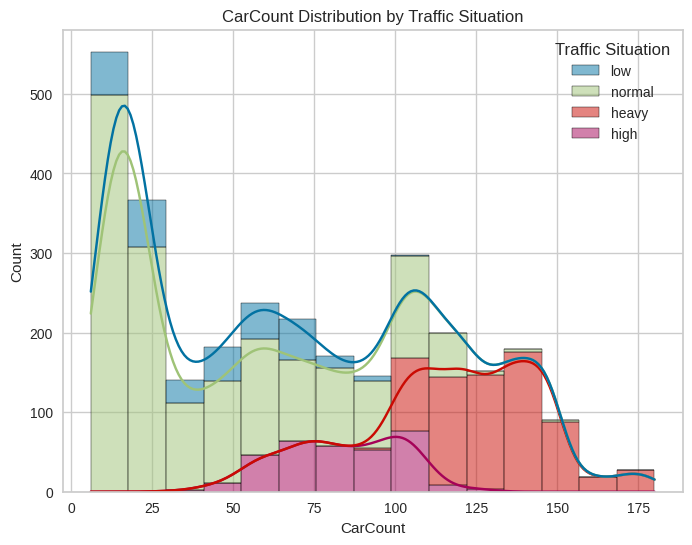

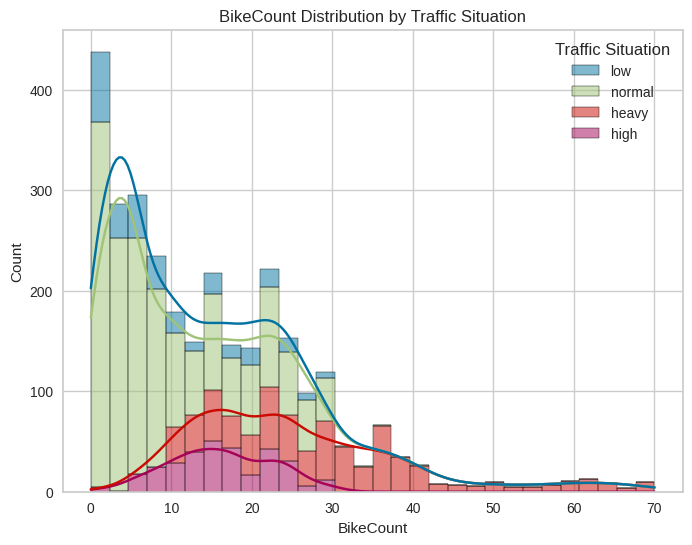

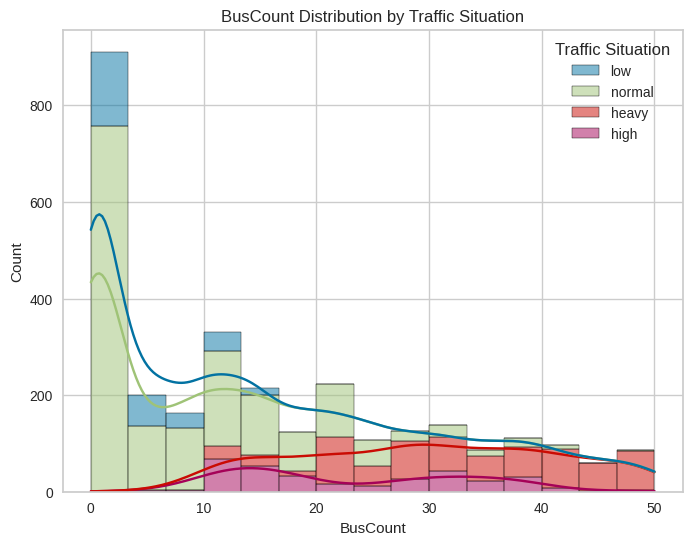

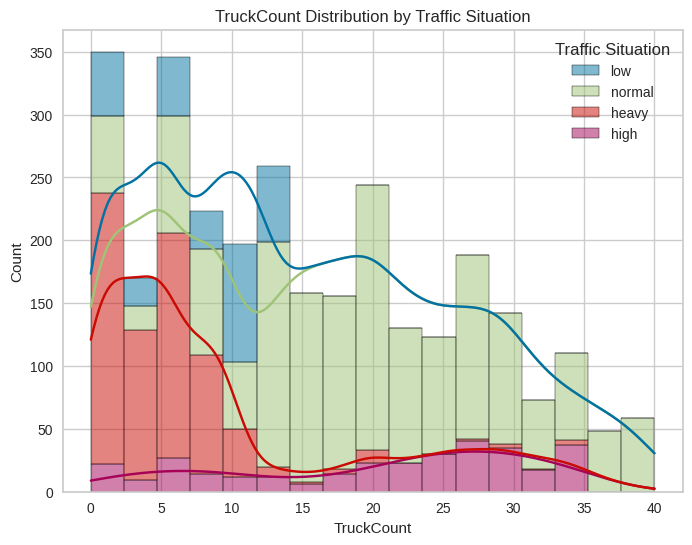

In [9]:
vehicle_columns=['CarCount','BikeCount','BusCount','TruckCount']

for vehicle in vehicle_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=vehicle, hue='Traffic Situation', kde=True, multiple='stack')
    plt.title(f'{vehicle} Distribution by Traffic Situation')
    plt.show()

In [10]:
x=df.drop(['Traffic Situation'],axis=1)
y=df['Traffic Situation']

In [11]:
x.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,12:00:00 AM,10,Tuesday,31,0,4,4,39
1,12:15:00 AM,10,Tuesday,49,0,3,3,55
2,12:30:00 AM,10,Tuesday,46,0,3,6,55
3,12:45:00 AM,10,Tuesday,51,0,2,5,58
4,1:00:00 AM,10,Tuesday,57,6,15,16,94


In [12]:
le=LabelEncoder()
for col in x.select_dtypes('object').columns:
    x[col]=le.fit_transform(x[col])

In [13]:
df['Time'].unique()


array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [14]:
df['Time'].nunique()

96

In [15]:
x['Time'].unique()

array([16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48,
       50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82,
       84, 86, 88, 90, 92, 94,  0,  2,  4,  6,  8, 10, 12, 14, 17, 19, 21,
       23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55,
       57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89,
       91, 93, 95,  1,  3,  5,  7,  9, 11, 13, 15])

In [16]:
df['Time'].nunique()

96

In [17]:
y=le.fit_transform(y)
y

array([2, 2, 2, ..., 3, 3, 3])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.2)

In [19]:
x_test.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
695,62,17,5,113,7,10,16,146
1603,55,26,4,122,16,28,6,172
500,56,15,3,75,1,8,10,94
2144,80,1,6,128,15,43,5,191
501,58,15,3,75,1,7,9,92


In [20]:
y_test[:5]

array([3, 0, 2, 0, 2])

In [21]:
models = {
    'Linear_Regression':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'XGB':XGBRegressor(),
    'SVM':SVC()
}

In [22]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

 
    accuracy = accuracy_score(y_test, obj_pred>0.5)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

  
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)


print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.192953   0.231364  0.192953  0.138431
1                KNN  0.307047   0.233465  0.307047  0.231867
2       DecisionTree  0.333893   0.234048  0.333893  0.247063
3       RandomForest  0.333893   0.234048  0.333893  0.247063
4                XGB  0.333893   0.234048  0.333893  0.247063
5                SVM  0.327181   0.222154  0.327181  0.239977


In [23]:
svm_model = SVC()
params={
    'kernel':['poly','rbf','linear'],
    'C':[0.1,10,100]
}
grid=GridSearchCV(svm_model,params,cv=5)
grid.fit(x_train,y_train)

print('grid best params=',grid.best_params_)
print('grid best score =',grid.best_score_)

y_pred = grid.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

grid best params= {'C': 100, 'kernel': 'rbf'}
grid best score = 0.9478991596638655
Accuracy: 0.959731543624161
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       129
           1       0.91      0.91      0.91        70
           2       0.91      0.96      0.93        72
           3       0.97      0.96      0.97       325

    accuracy                           0.96       596
   macro avg       0.94      0.95      0.95       596
weighted avg       0.96      0.96      0.96       596



In [24]:
# Original array of strings
u = np.array([62, 17, 5, 113, 7, 10, 16, 146])

# Convert to integer
u = u.astype(int)

# Correctly reshape the array to make it 2D: 1 sample with multiple features
u = u.reshape(1, -1)

# Assuming 'grid' is your trained model
print(grid.predict(u))


[3]
